In [1]:
import matplotlib.pyplot as plt
%matplotlib inline

import numpy as np
import pandas as pd
import random
import seaborn as sns


$L(\beta_{0}, \beta_{1}) = \frac{1}{n}\sum\limits_{i=1}^{n} \left[ log\left( 1 + e^{\beta_{0} + X_{i}\beta_{1}}\right) - Y_{i}\left(\beta_{0} + X_{i}\beta_{1}\right)\right] + \lambda \beta_{1}^{2}$ .



In [2]:
n = 10000 
np.random.seed(265)
x1 = np.random.uniform(-5, 5, size=n) 
beta0 = 3
beta1 = -5
p = np.exp(beta0 + x1*beta1)/(1 + np.exp(beta0 + beta1*x1))
y = np.random.binomial(1, p, size=n)



In [3]:
def plot_betas_and_loss(beta0_all, beta1_all, loss_all, title=''):
    fig, ax = plt.subplots(1, 3, figsize=(18,5))
    ax[0].plot(np.arange(len(beta0_all)), beta0_all)
    ax[0].hlines(beta0, xmin=0, xmax=len(beta0_all),color = 'r')
    ax[0].set_xlabel("Iteration", fontsize=12)
    ax[0].set_ylabel(r"$\widehat{\beta}_{0}$", fontsize=12)

    ax[1].plot(np.arange(len(beta1_all)), beta1_all)
    ax[1].hlines(beta1, xmin=0, xmax=len(beta1_all),color = 'r')
    ax[1].set_xlabel("Iteration", fontsize=12)
    ax[1].set_ylabel(r"$\widehat{\beta}_{1}$", fontsize=12)
    ax[1].set_title(title)

    ax[2].plot(np.arange(len(loss_all)), loss_all)
    ax[2].set_xlabel("Iteration", fontsize=12)
    ax[2].set_ylabel("Loss", fontsize=12)
    plt.show()



$\dfrac{\partial}{\partial \beta_{0}}=\frac{1}{n} \sum_{i=1}^{n} [ \frac{e^{B_0+X_i B_1}}{1+e^{B_0+X_i B_1}} -Y_i]$





$\dfrac{\partial}{\partial \beta_{1}}=\frac{1}{n} \sum_{i=1}^{n} [ \frac{e^{B_0+X_i B_1} \cdot X_i}{1+e^{B_0+X_i B_1}}-Y_i X_i]+2\lambda B_1$

In [4]:
from math import e
import math
def update(b0, b1, inds, step_size, lamb):
    L_partial0 = 0
    L_partial1 = 0 
    for i in inds:
        L_partial0 = L_partial0+ (((e**(b0+x1[i]*b1))\
        /(1+e**(b0+x1[i]*b1)) ) -y[i])
        L_partial1 = L_partial1+ (((e**(b0+x1[i]*b1)*x1[i])\
        /(1+e**(b0+x1[i]*b1))) -(y[i]*x1[i]))
        
    L_partial0 = (L_partial0/len(inds)) 
    L_partial1 = (L_partial1/len(inds)) + (2*lamb*b1)
    
    b0 -= step_size * L_partial0
    b1 -= step_size * L_partial1
    return (b0, b1)

In [5]:

def loss(b0, b1, inds, lamb):
    output=0
    for i in inds:
        output = output+ math.log((1+ e**(b0+x1[i]*b1)))\
        - (y[i]*(b0+x1[i]*b1))
    output=(output/len(inds)) + (lamb*(b1**2))
    return output

In [6]:
import random
def minibatch_grad_descent(b0=0, b1=0, batch_size=100, step_size=10, \
                           lamb=0, iterations=1000):
    beta0_hat = b0
    beta1_hat = b1
    beta0_all = []
    beta1_all = []
    loss_all = []

    for iter in range(iterations):   
        inds = random.sample(range(0, len(x1)), batch_size)
        batch_loss = loss(beta0_hat,  beta1_hat, inds, lamb)
        beta0_hat, beta1_hat = update(beta0_hat, beta1_hat, \
                                      inds, step_size, lamb)

        beta0_all.append(beta0_hat)
        beta1_all.append(beta1_hat)
        loss_all.append(batch_loss)
        iter = iter+1
        
    return (beta0_hat, beta1_hat, beta0_all, beta1_all, loss_all)



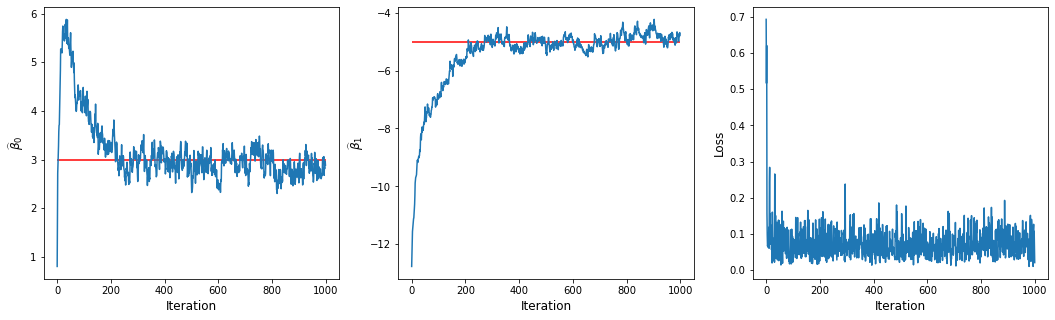

In [7]:

beta0_hat, beta1_hat, beta0_all, beta1_all, loss_all = \
minibatch_grad_descent()
plot_betas_and_loss(beta0_all, beta1_all, loss_all)


In [8]:

from tqdm import tqdm

beta0_hat_all_0 = []
beta1_hat_all_0 = []
for rep in tqdm(range(30)):
    beta0_hat, beta1_hat, _, _, _ = minibatch_grad_descent()
    beta0_hat_all_0.append(beta0_hat)
    beta1_hat_all_0.append(beta1_hat)
    
print('The mean of the estimated beta0 is %.2f' % np.mean(beta0_hat_all_0))
print('The standard deviation of the estimated beta0 is %.3f' % \
      np.std(beta0_hat_all_0))
print('The mean of the estimated beta1 is %.2f' % np.mean(beta1_hat_all_0))
print('The standard deviation of the estimated beta1 is %.3f' % \
      np.std(beta1_hat_all_0))

100%|██████████| 30/30 [00:21<00:00,  1.38it/s]

The mean of the estimated beta0 is 2.89
The standard deviation of the estimated beta0 is 0.184
The mean of the estimated beta1 is -4.86
The standard deviation of the estimated beta1 is 0.223




$$B_0 \in [2.83- 2.045 \cdot 0.247 ,  2.83+ 2.045 \cdot 0.247]= [2.325, 3.335 ]$$

$$B_1 \in [-4.93- 2.045 \cdot 0.224 ,  -4.93+ 2.045 \cdot 0.224]= [-5.388,-4.472]$$

The true parameters ($B_0=3$ and $B_1=-5$) are in the confidence interval. 


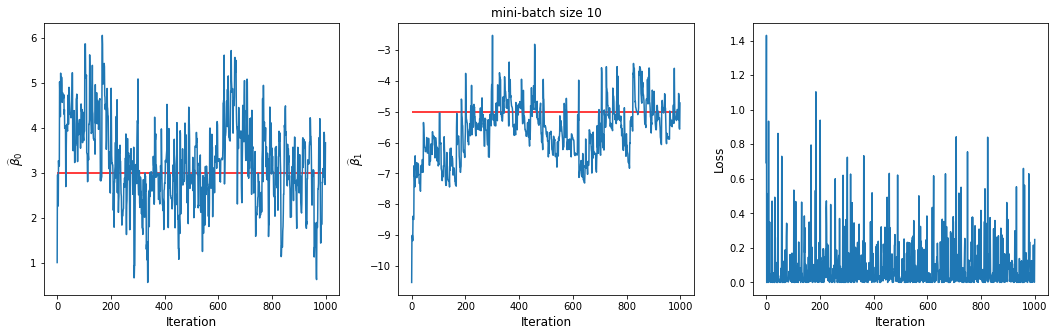

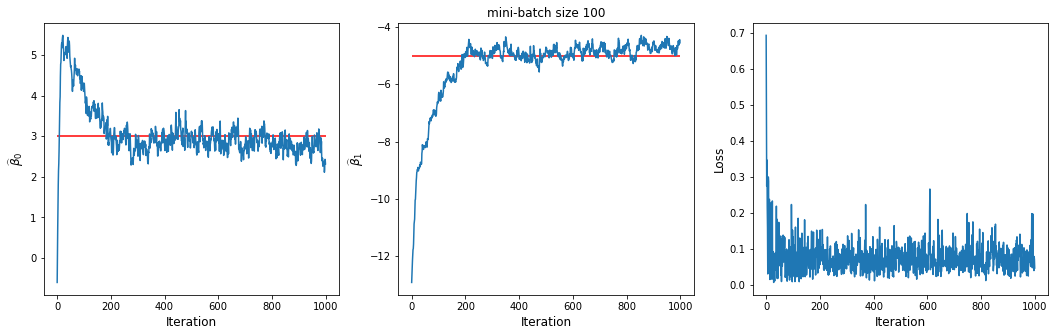

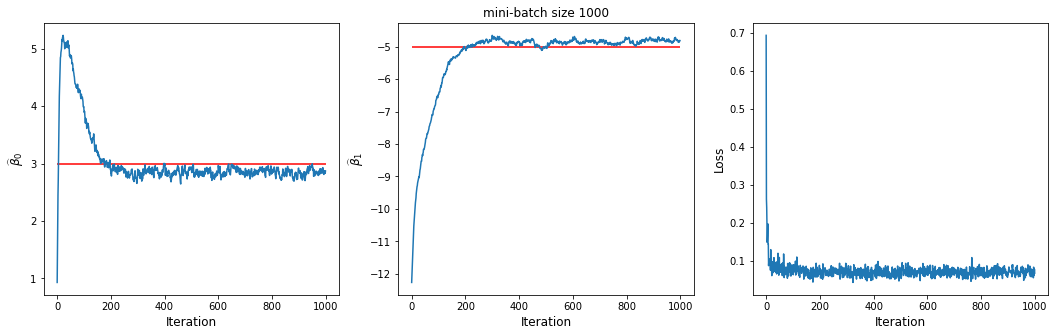

In [9]:


for batch_size in [10, 100, 1000]:
    _, _, beta0_all, beta1_all, loss_all = \
    minibatch_grad_descent(batch_size=batch_size)
    plot_betas_and_loss(beta0_all, beta1_all, loss_all, \
                        title='mini-batch size %d' % batch_size)


1. The bigger the sample size, the more closely it "represents" the entire population and thus has a lower standard deviation from the true value. For a batch of 10, we can see that many iterations are far from the true value, but as we increase our batch size to 1000, each interation creates an estimate that is much closer to the true value. 
2. The third run (sample size 1000) creates a better estimate than the others as each interation is much closer to the actual value due to the larger sample size.


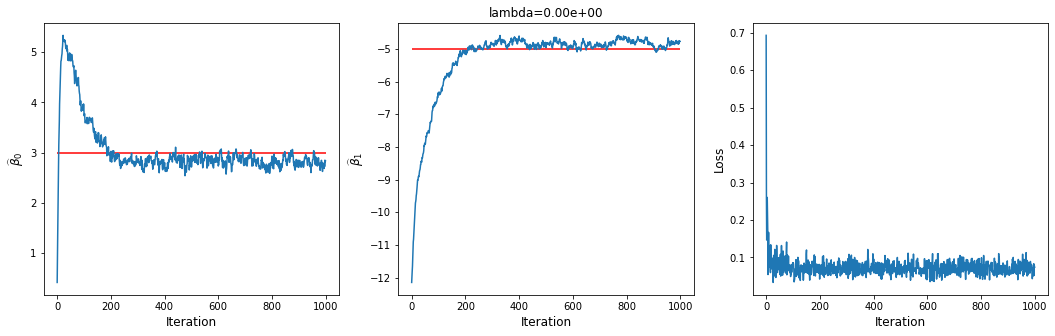

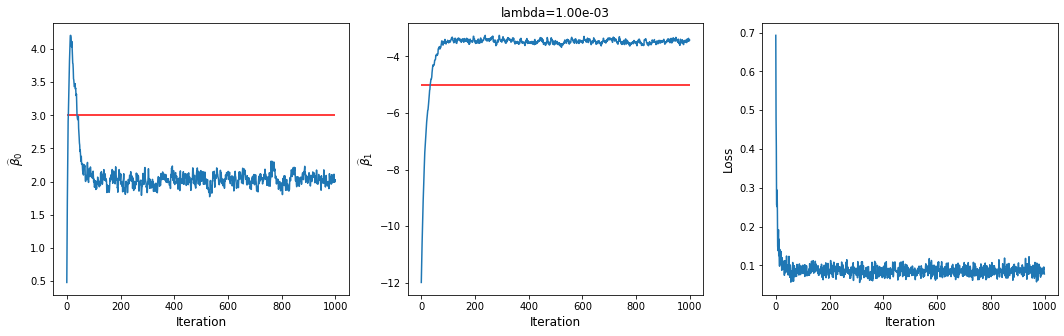

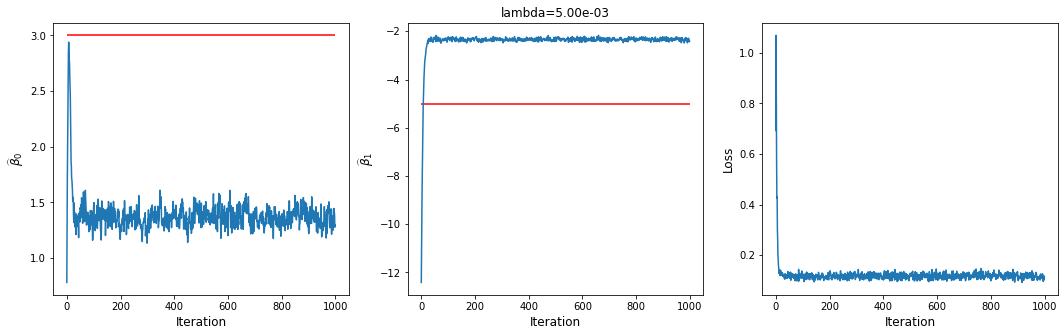

In [10]:

for lamb in [0, .001, .005]:
    _, _, beta0_all, beta1_all, loss_all = \
    minibatch_grad_descent(batch_size=500, lamb=lamb)
    plot_betas_and_loss(beta0_all, beta1_all, loss_all, \
                        title = 'lambda=%.2e' % lamb)

1. When lambda equals 0, we have less bias, but more variance. This can be seen in the fact that over the iterations the estimates for $B_1$ vary more, however overall they are closer to the true value. As lambda increases the bias increases, but the variance decreases. This can be seen in the last graph where over the iterations there is less variation in $B_1$, but the values are far from the actual value. 
2. For this scenario, a lower lambda (lambda = 0) gives a better estimate. Despite the higher variation, the results are still much closer to the actual value than for a higher lambda. If we regularize in this problem, the values reach an equilibrium, but it is not the correct one. 

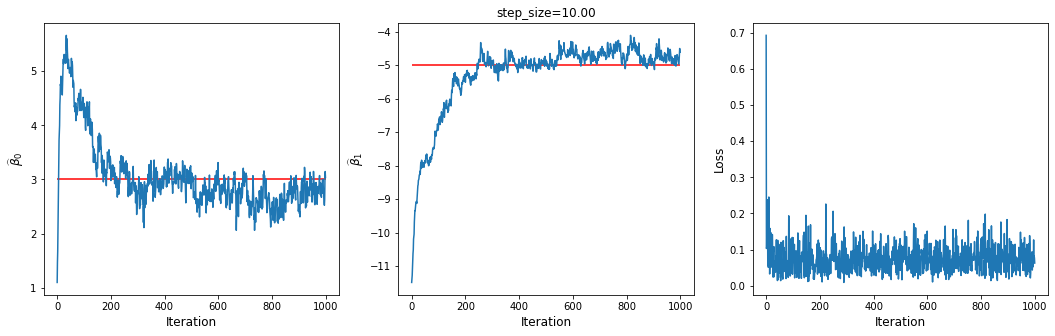

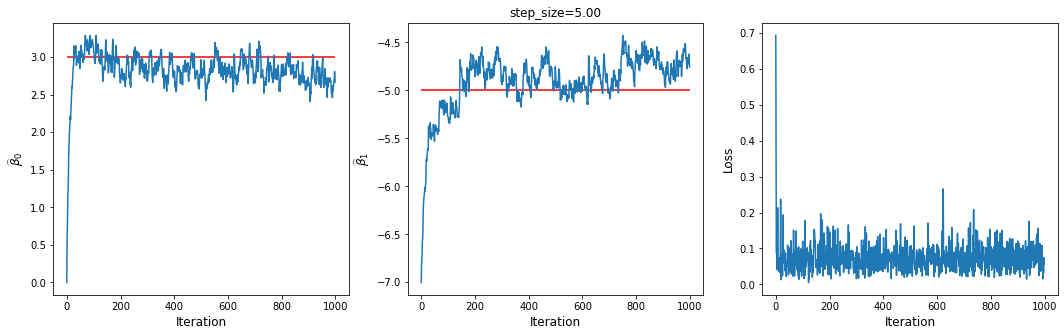

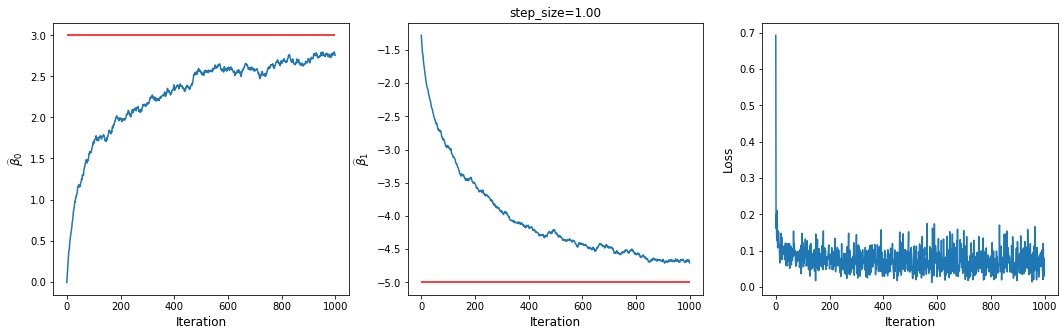

In [11]:


for step_size in [10, 5, 1]:
    _, _, beta0_all, beta1_all, loss_all = \
    minibatch_grad_descent(batch_size=100, step_size=step_size)
    plot_betas_and_loss(beta0_all, beta1_all, loss_all, title\
                        = 'step_size=%.2f' % step_size)

1. In the first plot (step size is 10) the algorithm reaches the vinicity of the true value quickly and "bounces around" a lot more, ie there is more variance around the true value, due to the fact that it makes larger jumps every time. A smaller step size nears the optimal value slower and then "bounces around" less. 
2. The run with a step size of one has not converged. There are too few iterations and with a small step size it has not reached the vicinity of the true value. We would need more iterations for this to be a good estimate. 
3. For this model it seems that 1 is too low of a step size, especially with 1000 iterations and 5 seems too high. Given the following graphs I would set the step size at 3 and the iterations at about 2000. I would run the model several times (depending on computational speed) and take the mean of the final parameter results. 